# Project Overview  
In this project, you will play detective, and put your machine learning skills to use by building an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

The features in the data fall into three major types, namely financial features, email features and POI labels.

- financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

- email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

- POI label: [‘poi’] (boolean, represented as integer)

You are encouraged to make, transform or rescale new features from the starter features. If you do this, you should store the new feature to my_dataset, and if you use the new feature in the final algorithm, you should also add the feature name to my_feature_list, so your coach can access it during testing. For a concrete example of a new feature that you could add to the dataset, refer to the lesson on Feature Selection.


## Some relevant files 

- poi_id.py : starter code for the POI identifier, you will write your analysis here 

- final_project_dataset.pkl : the dataset for the project, more details below 

- tester.py : when you turn in your analysis for evaluation by a Udacity evaluator, you will submit the algorithm, dataset and list of features that you use (these are created automatically in poi_id.py). The evaluator will then use this code to test your result, to make sure we see performance that’s similar to what you report. You don’t need to do anything with this code, but we provide it for transparency and for your reference. 

- emails_by_address : this directory contains many text files, each of which contains all the messages to or from a particular email address. It is for your reference, if you want to create more advanced features based on the details of the emails dataset.

### POI's list from analysis below ###

***From salary and bonus***  

- Skilling Jeffrey K, Lay Kenneth by looking at the salary and bonus -- which are the outliers, we can say they are definitely poi. As they have also been marked poi = True.

- Frevert Mark A is also an outlier with salary in a high range, but is not marked as poi. We will still investigate him further.

- Lavorato John J is also a suspect because of the highest bonus. But not marked as poi. We will still investiage him further.

***From poi message counts*** 

- Lavorato John J has received/sent a lot of emails as/to poi.
- Delainey David W has sent highest count of emails to poi. And is also recognised as a poi.
- Kean Steven J, Beck Sally W have sent 3rd and 4th highest emails to poi. And by looking at a graph between from_poi_to_this_person vs from_this_person_to_poi  can be considered as outliers.


In [3]:
#!/usr/bin/python
#poi_id.py

import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data



C:\Users\tshrs\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Task 1: Select what features you'll use. 

In [4]:

###Features_list is a list of strings, each of which is a feature name.
###The first feature must be "poi".

features_list = ['poi','salary','bonus']


In [5]:

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print data_dict['METTS MARK']


{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


**The above data dictionary looks like below :**  

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}, 


***Move to pandas dataframe***

In [6]:

df = pd.DataFrame.from_dict(data_dict,orient='index')

df.head()


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [7]:
df.dtypes

salary                       object
to_messages                  object
deferral_payments            object
total_payments               object
exercised_stock_options      object
bonus                        object
restricted_stock             object
shared_receipt_with_poi      object
restricted_stock_deferred    object
total_stock_value            object
expenses                     object
loan_advances                object
from_messages                object
other                        object
from_this_person_to_poi      object
poi                            bool
director_fees                object
deferred_income              object
long_term_incentive          object
email_address                object
from_poi_to_this_person      object
dtype: object

In [8]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,102,42,98,84,19,125,...,5,65,93,42,2,18,45,53,112,58
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,51,60,107,21,44,64,36,60,128,20,...,142,60,53,60,128,129,97,80,35,60


In [9]:

###some stats on data

#count persons
print len(data_dict)

#count features
print len(data_dict['METTS MARK'])

#no. of rows=records and column=features
print df.shape

146
21
(146, 21)


In [10]:

###how may poi's

count_poi = 0
for key in data_dict:
    if data_dict[key]["poi"] == True:
        count_poi = count_poi + 1

print(count_poi) 

#using pandas

print(df.poi == True).sum()  

18
18


In [11]:

###How many folks in this dataset have a quantified salary? What about a known email address?

count_salary_nan = 0
count_bonus_nan = 0

for key in data_dict:
    if data_dict[key]["salary"] == 'NaN':
        count_salary_nan = count_salary_nan + 1
    if data_dict[key]["bonus"] == 'NaN':
        count_bonus_nan = count_bonus_nan + 1

print(count_salary_nan)
print(count_bonus_nan)

###or

df = df.replace('NaN', np.nan)
df.isnull().sum()

51
64


salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person       60
dtype: int64

***Replacing numeric null values with zeroes*** 

In [12]:
df['salary'].fillna(0, inplace = True) 
df['to_messages'].fillna(0, inplace = True) 
df['deferral_payments'].fillna(0, inplace = True) 
df['total_payments'].fillna(0, inplace = True) 
df['exercised_stock_options'].fillna(0, inplace = True) 
df['bonus'].fillna(0, inplace = True) 
df['restricted_stock'].fillna(0, inplace = True) 
df['total_stock_value'].fillna(0, inplace = True) 
df['from_this_person_to_poi'].fillna(0, inplace = True) 
df['from_poi_to_this_person'].fillna(0, inplace = True) 


In [13]:
df.isnull().sum()

salary                         0
to_messages                    0
deferral_payments              0
total_payments                 0
exercised_stock_options        0
bonus                          0
restricted_stock               0
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value              0
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi        0
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person        0
dtype: int64

### Task 2: Remove outliers

#### Plot data points 

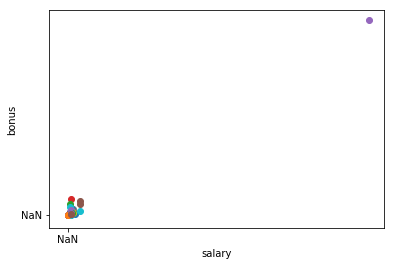

In [14]:
for point in data_dict:
    salary = data_dict[point]["salary"]
    bonus = data_dict[point]["bonus"]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

#or



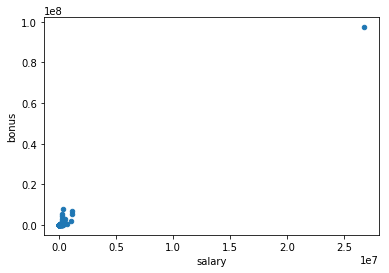

In [15]:
df.plot.scatter(x='salary',y='bonus')

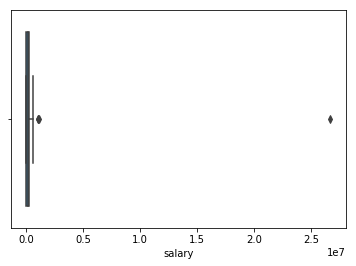

In [16]:
sns.boxplot(x=df['salary'])

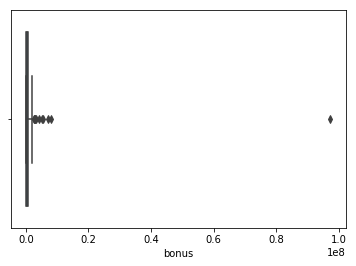

In [17]:
sns.boxplot(x=df['bonus'])

**Finding the outlier**

In [18]:
df.loc[df['salary'].idxmax()]

salary                       2.67042e+07
to_messages                            0
deferral_payments            3.20834e+07
total_payments               3.09887e+08
exercised_stock_options      3.11764e+08
bonus                        9.73436e+07
restricted_stock             1.30322e+08
shared_receipt_with_poi              NaN
restricted_stock_deferred   -7.57679e+06
total_stock_value             4.3451e+08
expenses                      5.2352e+06
loan_advances                 8.3925e+07
from_messages                        NaN
other                        4.26676e+07
from_this_person_to_poi                0
poi                                False
director_fees                1.39852e+06
deferred_income             -2.79929e+07
long_term_incentive          4.85219e+07
email_address                        NaN
from_poi_to_this_person                0
Name: TOTAL, dtype: object

In [19]:
df['salary'].idxmax()

'TOTAL'

***Remove outlier-TOTAL***

In [20]:
df = df.drop(['TOTAL'])

In [21]:
#no. of rows=records and column=features
print df.shape

(145, 21)


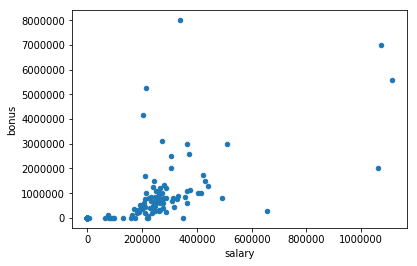

In [22]:
df.plot.scatter(x='salary',y='bonus')

**As per the above plot there are still 4 persons who have high salary and bonus.**

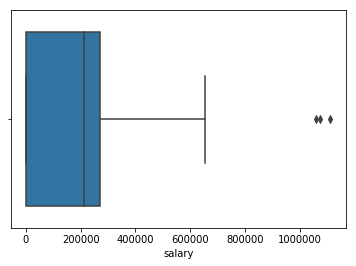

In [23]:
sns.boxplot(x=df['salary'])

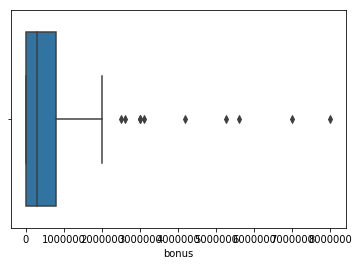

In [24]:
sns.boxplot(x=df['bonus'])

In [25]:
df.max()

salary                                 1.11126e+06
to_messages                                  15149
deferral_payments                      6.42699e+06
total_payments                          1.0356e+08
exercised_stock_options                3.43484e+07
bonus                                        8e+06
restricted_stock                       1.47617e+07
shared_receipt_with_poi                       5521
restricted_stock_deferred              1.54563e+07
total_stock_value                      4.91101e+07
expenses                                    228763
loan_advances                           8.1525e+07
from_messages                                14368
other                                  1.03597e+07
from_this_person_to_poi                        609
poi                                           True
director_fees                               137864
deferred_income                               -833
long_term_incentive                    5.14543e+06
email_address                we

In [26]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [27]:

df_salary_sorted = df.sort_values('salary', inplace=False, ascending=False)
df_bonus_sorted = df.sort_values('bonus', inplace=False, ascending=False)

***Sort by salary***

In [28]:
df_salary_sorted.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,NaN,26093672.0,29336.0,NaN,108.0,22122.0,30.0,True,NaN,NaN,1920000.0,jeff.skilling@enron.com,88.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,99832.0,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,86987.0,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
PICKERING MARK R,655037.0,898.0,0.0,1386690.0,28798.0,300000.0,0.0,728.0,NaN,28798.0,31653.0,400000.0,67.0,NaN,0.0,False,NaN,NaN,NaN,mark.pickering@enron.com,7.0
WHALLEY LAWRENCE G,510364.0,6019.0,0.0,4677574.0,3282960.0,3000000.0,2796177.0,3920.0,NaN,6079137.0,57838.0,NaN,556.0,301026.0,24.0,False,NaN,NaN,808346.0,greg.whalley@enron.com,186.0


***Sort by bonus***

In [29]:
df_bonus_sorted.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAVORATO JOHN J,339288.0,7259.0,0.0,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,NaN,5167144.0,49537.0,NaN,2585.0,1552.0,411.0,False,NaN,NaN,2035380.0,john.lavorato@enron.com,528.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,99832.0,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,NaN,26093672.0,29336.0,NaN,108.0,22122.0,30.0,True,NaN,NaN,1920000.0,jeff.skilling@enron.com,88.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,17355.0,NaN,484.0,210698.0,108.0,True,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,13868.0,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0


In [30]:

#get column index

print df.columns.get_loc("salary")
print df.columns.get_loc("bonus")
print df.columns.get_loc("poi")


0
5
15


In [31]:

#first 5 rows

df_salary_sorted.iloc[0:5 , [0,5,15] ]

,salary,bonus,poi
SKILLING JEFFREY K,1111258.0,5600000.0,True
LAY KENNETH L,1072321.0,7000000.0,True
FREVERT MARK A,1060932.0,2000000.0,False
PICKERING MARK R,655037.0,300000.0,False
WHALLEY LAWRENCE G,510364.0,3000000.0,False


In [32]:
df_bonus_sorted.iloc[0:5 , [0,5,15] ]

,salary,bonus,poi
LAVORATO JOHN J,339288.0,8000000.0,False
LAY KENNETH L,1072321.0,7000000.0,True
SKILLING JEFFREY K,1111258.0,5600000.0,True
BELDEN TIMOTHY N,213999.0,5249999.0,True
ALLEN PHILLIP K,201955.0,4175000.0,False


***OSERVATIONS TILL NOW*** 

- By looking at the salary and bonus Skilling Jeffrey K, Lay Kenneth which are the outliers, we can say they are definitely poi. As they have also been marked poi = True.

- Frevert Mark A is also an outlier with salary in a high range, but is not marked as poi. We will still investigate him further.

- Lavorato John J is also a suspect because of the highest bonus. But not marked as poi. We will still investiage him further.

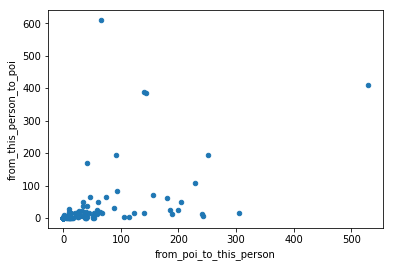

In [33]:
df.plot.scatter(x='from_poi_to_this_person',y='from_this_person_to_poi')

In [34]:
from_poi_to_this_person_sorted = df.sort_values('from_poi_to_this_person', inplace=False, ascending=False)

In [35]:
from_this_person_to_poi_sorted = df.sort_values('from_this_person_to_poi', inplace=False, ascending=False)

In [36]:
from_poi_to_this_person_sorted.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAVORATO JOHN J,339288.0,7259.0,0.0,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,NaN,5167144.0,49537.0,NaN,2585.0,1552.0,411.0,False,NaN,NaN,2035380.0,john.lavorato@enron.com,528.0
DIETRICH JANET R,250100.0,2572.0,0.0,1410464.0,1550019.0,600000.0,315068.0,1902.0,NaN,1865087.0,3475.0,NaN,63.0,473.0,14.0,False,NaN,NaN,556416.0,janet.dietrich@enron.com,305.0
KITCHEN LOUISE,271442.0,8305.0,0.0,3471141.0,81042.0,3100000.0,466101.0,3669.0,NaN,547143.0,5774.0,NaN,1728.0,93925.0,194.0,False,NaN,NaN,NaN,louise.kitchen@enron.com,251.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,86987.0,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
COLWELL WESLEY,288542.0,1758.0,27610.0,1490344.0,0.0,1200000.0,698242.0,1132.0,NaN,698242.0,16514.0,NaN,40.0,101740.0,11.0,True,NaN,-144062.0,NaN,wes.colwell@enron.com,240.0


In [37]:
from_this_person_to_poi_sorted.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
DELAINEY DAVID W,365163.0,3093.0,0.0,4747979.0,2291113.0,3000000.0,1323148.0,2097.0,NaN,3614261.0,86174.0,NaN,3069.0,1661.0,609.0,True,NaN,NaN,1294981.0,david.delainey@enron.com,66.0
LAVORATO JOHN J,339288.0,7259.0,0.0,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,NaN,5167144.0,49537.0,NaN,2585.0,1552.0,411.0,False,NaN,NaN,2035380.0,john.lavorato@enron.com,528.0
KEAN STEVEN J,404338.0,12754.0,0.0,1747522.0,2022048.0,1000000.0,4131594.0,3639.0,NaN,6153642.0,41953.0,NaN,6759.0,1231.0,387.0,False,NaN,NaN,300000.0,steven.kean@enron.com,140.0
BECK SALLY W,231330.0,7315.0,0.0,969068.0,0.0,700000.0,126027.0,2639.0,NaN,126027.0,37172.0,NaN,4343.0,566.0,386.0,False,NaN,NaN,NaN,sally.beck@enron.com,144.0
MCCONNELL MICHAEL S,365038.0,3329.0,0.0,2101364.0,1623010.0,1100000.0,1478269.0,2189.0,NaN,3101279.0,81364.0,NaN,2742.0,540.0,194.0,False,NaN,NaN,554422.0,mike.mcconnell@enron.com,92.0


In [38]:
#get column index

print df.columns.get_loc("from_this_person_to_poi")
print df.columns.get_loc("from_poi_to_this_person")

14
20


In [39]:
from_poi_to_this_person_sorted.iloc[0:5 , [20,14,15]]

,from_poi_to_this_person,from_this_person_to_poi,poi
LAVORATO JOHN J,528.0,411.0,False
DIETRICH JANET R,305.0,14.0,False
KITCHEN LOUISE,251.0,194.0,False
FREVERT MARK A,242.0,6.0,False
COLWELL WESLEY,240.0,11.0,True


In [40]:
from_this_person_to_poi_sorted.iloc[0:5 , [14,20,15] ]

,from_this_person_to_poi,from_poi_to_this_person,poi
DELAINEY DAVID W,609.0,66.0,True
LAVORATO JOHN J,411.0,528.0,False
KEAN STEVEN J,387.0,140.0,False
BECK SALLY W,386.0,144.0,False
MCCONNELL MICHAEL S,194.0,92.0,False


***OBSERVATIONS TILL NOW***

- Lavorato John J has received/sent a lot of emails as/to poi.
- Delainey David W has sent highest count of emails to poi. And is also recognised as a poi.
- Kean Steven J, Beck Sally W have sent 3rd and 4th highest emails to poi. And by looking at a graph between from_poi_to_this_person vs from_this_person_to_poi  can be considered as outliers.

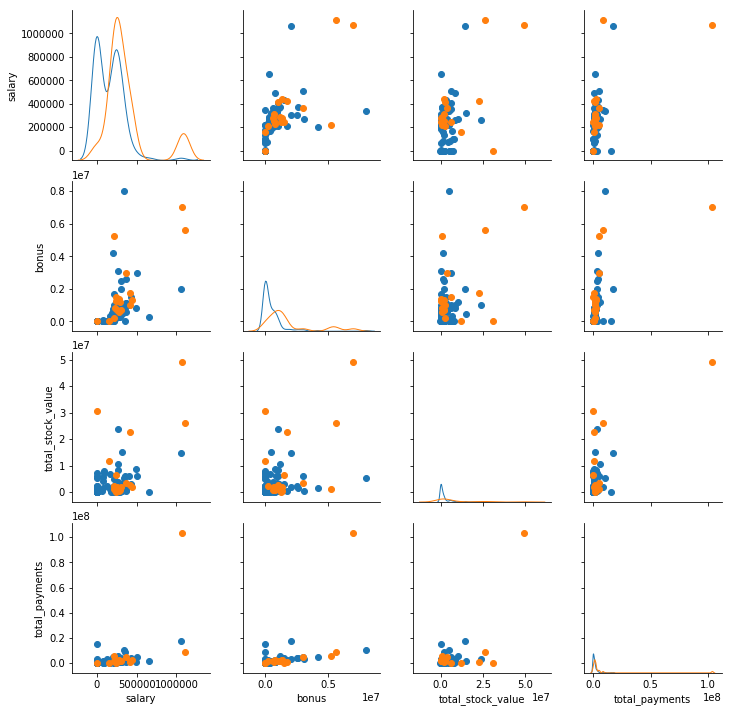

In [41]:

g = sns.PairGrid(df, vars=['salary','bonus','total_stock_value','total_payments'],
                hue='poi')
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=1)


***Let's remove the outliers for the below persons:***

- Lavorato John J
- Delainey David W
- Kean Steven J 
- Beck Sally W
- Skilling Jeffrey K
- Lay Kenneth 
- Frevert Mark A 


In [42]:
#df = df.drop(['LAVORATO JOHN J','DELAINEY DAVID W','KEAN STEVEN J','BECK SALLY W','SKILLING JEFFREY K','LAY KENNETH L','FREVERT MARK A'])


In [43]:
print df.shape

(145, 21)


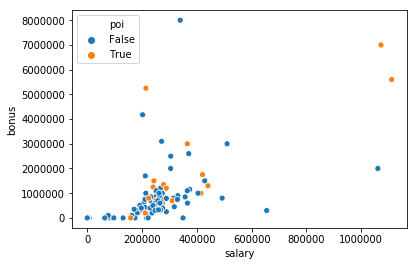

In [44]:

#df.plot.scatter(x='salary',y='bonus')

sns.scatterplot(x='salary',y='bonus',data=df,hue='poi')

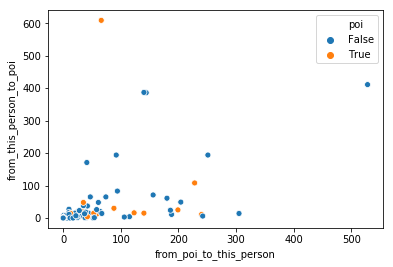

In [45]:
#df.plot.scatter(x='from_poi_to_this_person',y='from_this_person_to_poi')

sns.scatterplot(x='from_poi_to_this_person',y='from_this_person_to_poi',data=df,hue='poi')

# Task 3: Feature scaling AND Modelling #

**Dataframe for train_test_split with selected features**

In [46]:
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,13868.0,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,0.0
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,56301.0,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,11200.0,NaN,NaN,2660303.0,0.0,False,NaN,-1386055.0,1586055.0,NaN,0.0
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,NaN,-82782.0,63014.0,129142.0,NaN,NaN,69.0,0.0,False,NaN,-201641.0,NaN,frank.bay@enron.com,0.0


In [47]:
#df_features = df[['salary','bonus','deferral_payments','total_payments','exercised_stock_options','restricted_stock','total_stock_value','from_poi_to_this_person','from_this_person_to_poi']].copy()
df_features = df[['salary','bonus','from_poi_to_this_person','from_this_person_to_poi']].copy()
df_features

,salary,bonus,from_poi_to_this_person,from_this_person_to_poi
ALLEN PHILLIP K,201955.0,4175000.0,47.0,65.0
BADUM JAMES P,0.0,0.0,0.0,0.0
BANNANTINE JAMES M,477.0,0.0,39.0,0.0
BAXTER JOHN C,267102.0,1200000.0,0.0,0.0
BAY FRANKLIN R,239671.0,400000.0,0.0,0.0
BAZELIDES PHILIP J,80818.0,0.0,0.0,0.0
BECK SALLY W,231330.0,700000.0,144.0,386.0
BELDEN TIMOTHY N,213999.0,5249999.0,228.0,108.0
BELFER ROBERT,0.0,0.0,0.0,0.0
BERBERIAN DAVID,216582.0,0.0,0.0,0.0


In [48]:
df_poi = df[['poi']].copy()
df_poi.head()

,poi
ALLEN PHILLIP K,False
BADUM JAMES P,False
BANNANTINE JAMES M,False
BAXTER JOHN C,False
BAY FRANKLIN R,False


In [53]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(df_features, df_poi, test_size=0.2, random_state=42)


In [54]:
print features_train.shape
print features_test.shape
print labels_train.shape
print labels_test.shape

(116, 4)
(29, 4)
(116, 1)
(29, 1)


In [51]:
#from sklearn.feature_selection import SelectKBest, chi2
#X_new = SelectKBest(chi2,k=4).fit_transform(features_train, labels_train)
#X_new.shape

In [55]:
from time import time
from sklearn import svm
from sklearn.metrics import accuracy_score

t0 = time()
clf = svm.SVC(kernel = 'rbf', C = 1000, probability= True )

clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
pred_prob = clf.predict_proba(features_test)
print "testing time:", round(time()-t1, 3), "s"

training time: 0.027 s
testing time: 0.002 s


C:\Users\tshrs\Anaconda3\envs\py2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
t0 = time()
clf.fit(features_train,labels_train)
print("training time:", round(time()-t0, 3), "s")

t1 = time()
pred = clf.predict(features_test)
print("training time:", round(time()-t1, 3), "s")

accuracy = accuracy_score(labels_test, pred)
print(accuracy)

('training time:', 0.004, 's')
('training time:', 0.002, 's')
0.827586206897


C:\Users\tshrs\Anaconda3\envs\py2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Task 4 : Evaluation ##

In [58]:
accuracy = accuracy_score(labels_test, pred)
print accuracy

0.827586206897


In [59]:
labels_test

,poi
IZZO LAWRENCE L,False
WINOKUR JR. HERBERT S,False
CORDES WILLIAM R,False
BUY RICHARD B,False
FALLON JAMES B,False
SHAPIRO RICHARD S,False
TAYLOR MITCHELL S,False
POWERS WILLIAM,False
LOCKHART EUGENE E,False
BUTTS ROBERT H,False


In [60]:
pred

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

In [61]:
(pred_prob)

array([[ 0.83793353,  0.16206647],
       [ 0.95150981,  0.04849019],
       [ 0.95145873,  0.04854127],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.95150981,  0.04849019],
       [ 0.95150981,  0.04849019],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,  0.16206647],
       [ 0.95150981,  0.04849019],
       [ 0.83793353,  0.16206647],
       [ 0.95150981,  0.04849019],
       [ 0.83793353,  0.16206647],
       [ 0.95149591,  0.04850409],
       [ 0.83797145,  0.16202855],
       [ 0.83793353,  0.16206647],
       [ 0.95150981,  0.04849019],
       [ 0.95150981,  0.04849019],
       [ 0.83793353,  0.16206647],
       [ 0.83793353,

The first column is the probability that the entry has the **False** label and the second column is the probability that the entry has the **True** label.

In [62]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(labels_test, pred,labels=[True,False])

[[ 0  3]
 [ 2 24]]


***Confusion matrix***

| Actual/Predicted | No | Yes |
| ---- | ------ | ------ | 
| No | TN | FP | 
| Yes | FN | TP | 

In [66]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(labels_test, pred, average="micro")
print('Precision score for new labels: ', precision)

recall = recall_score(labels_test, pred, average="micro")
print('Recall score: ', recall)

from sklearn.metrics import f1_score
f1score = f1_score(labels_test, pred, average="micro") 
print('F1 score score: ', f1score) 

('Precision score for new labels: ', 0.82758620689655171)
('Recall score: ', 0.82758620689655171)
('F1 score score: ', 0.82758620689655171)


In [67]:
precision = precision_score(labels_test, pred, average="macro")
print('Precision score for new labels: ', precision)

recall = recall_score(labels_test, pred, average="macro")
print('Recall score: ', recall)

from sklearn.metrics import f1_score
f1score = f1_score(labels_test, pred, average="macro") 
print('F1 score score: ', f1score) 

('Precision score for new labels: ', 0.44444444444444442)
('Recall score: ', 0.46153846153846156)
('F1 score score: ', 0.45283018867924529)


### Conclusion ###

Against all the odds judging by its performance at the very beginning, our SVC classifier got great results: above the 0.3 mark — in both Precision and Recall — required for the submission of the project. But let's dive deeper into each of these metrics to really understand their meaning in the Enron situation.

When it comes to evaluate an algorithm, there are several evaluation metrics at our disposal, as seen during the whole project. It follows that each metric is evaluating the classifier's performance in a certain way, so different metrics should be used where you care for some outcomes more than others.

In other words, each performance metrics favor one type of error over another, this allows our algorithm to be tuned and optimized for very specific outcomes.

### Why Accuracy is flawed### 

As an example, Accuracy is a perfectly valid metric. From a technical standpoint it describes the ratio between the number of items in a class labeled correctly and all the items in a class.

In the Enron case, it means the algorithm is able to guess correctly whether a person is or is not a POI.

But sometimes this metric can be extremely misleading, particularly when dealing with imbalanced classes, or in other words, when the data is really skewed towards one class.

This is the case with the Enron set — since there are many more non-POIs than POIs, which introduces some special challenges, namely that you can just guess the more common class label for every point, which is not a very insightful strategy, but still get pretty good Accuracy.

### Recall###

That's the ultimate reason why the classifier has been also optimized for other metrics, more attuned to the nature of the data and the specifics of the social framework it described.

Another metric, Recall, describes the ability of the algorithm to correctly identify a POI provided that the person is a POI. Topping at a 0.35, means that 35% of the POI won't go unnoticed by the algorithm.

35% might seem low, but this metric is particularly insightful for the Enron case. Since we are dealing with a criminal situation, we want our classifier to err on the side of guessing guilty — higher levels of scrutiny — so it makes sure as many people get flagged as POI, maybe at a cost of identifying some innocent people along the way.

Boosting its Recall metric the classifier ensures that is correctly identifying every single POI. The tradeoff is that the algorithm will be biased towards "overdoing" it. In this particular situation this exactly what we are looking for: guarantee that no POIs will go unnoticed and (hope) the misclassified innocents will be declared innocent by the justice later on.

### Precision###

On the other hand, Precision topped at more than 32%. What this number is telling, is the chances that every time the algorithm is flagging somebody as POI, this person truly is a POI.

Unlike the previous situation, if the classifier doesn't have have great Recall, but it does have good Precision, it means that whenever a POI gets flagged in the test set, there's a lot of confidence that it’s very likely to be a real POI and not a false alarm.

On the other hand, the tradeoff is that sometimes real POIs are missed, since the classifier is effectively reluctant to pull the trigger on edge cases. Which in the case of Enron is definitely something we don't want.

### F1 Score###
It seems that neither Accuracy nor Precision were helping much in terms of assessing the results. For this reason, as a final note and despite not widely covered during class, I wanted to talk about the F1 score.

In some way, the F1 score can be thought of "the best of both worlds."

In its pure definition F1 "considers both the Precision and the Recall of the test to compute the score [...] The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0."

Technically it ensures that both False Positives an False Negatives rates are low, which translated to the Enron set, means that I can identify POIs reliably and accurately. If the identifier finds a POI then the person is almost certainly to be a POI, and if the identifier does not flag someone, then they are almost certainly not a POI.

To wrap it up, it is clear that in this context, Recall is way more important than both Accuracy and Precision. If further work ought to be performed to the final algorithm, given the specific data set and social framework, re-tuning the classifier to yield a better Recall score — even at the cost of lower Precision — would be the most effective way to ensure all POIs are prosecuted.